In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Input data has 2 directories: train and test each containing samples of benign and malignant skin cancer images.
<b> I will be not be loading libaries at the top, instead will be loading them as and when required for learning purposes </b>

## Loading basic libraries

In [2]:
# importing basic libraries

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob ## glob is used to retrieve files 

# set seed
np.random.seed(21)

## Loading images and making training and test set

In [3]:
from PIL import Image

directory_benign_train = '../input/skin-cancer-malignant-vs-benign/train/benign'
directory_malignant_train = '../input/skin-cancer-malignant-vs-benign/train/malignant'
directory_benign_test = '../input/skin-cancer-malignant-vs-benign/test/benign'
directory_malignant_test = '../input/skin-cancer-malignant-vs-benign/test/malignant'

## Loading images and converting them to numpy array using their RGB value
read = lambda imname: np.asarray(Image.open(imname).convert('RGB'))
# np.asarray converts the objects into array/list

# Loading train images
img_benign_train = [read(os.path.join(directory_benign_train, filename)) for filename in os.listdir(directory_benign_train)]
img_malignant_train = [read(os.path.join(directory_malignant_train, filename)) for filename in os.listdir(directory_malignant_train)]

# Loading test images
img_benign_test = [read(os.path.join(directory_benign_test, filename)) for filename in os.listdir(directory_benign_test)]
img_malignant_test = [read(os.path.join(directory_malignant_test, filename)) for filename in os.listdir(directory_malignant_test)]

#img_benign_train
type(img_benign_train)

list

In [4]:
# Converting list to numpy array for faster and more convenient operations going forward

X_benign_train = np.array(img_benign_train, dtype='uint8')
X_malignant_train = np.array(img_malignant_train, dtype='uint8')

X_benign_test = np.array(img_benign_test, dtype='uint8')
X_malignant_test = np.array(img_malignant_test, dtype='uint8')

type(X_benign_train)

numpy.ndarray

#### Note: Numpy array having the following advantages over a list:
<br>
1. Numpy array consume much less memory than lists.<br>
2. Numpy array can support a lot of mathematical operations that list cannot. Element wise operations are possible in np array but not in case of lists. (Np array contain only homogeneuos elements while lists can have heterogenous elements). Since they are homogeneous, it is much convenient to do calculations.<br> 
3. They can perform operations much faster as compared to lists.

<br><b>Detailed difference between numpy array and list found at: https://www.geeksforgeeks.org/python-lists-vs-numpy-arrays/ </b>

In [5]:
## Creating labels: benign is 0 and malignant is 1

y_benign_train = np.zeros(X_benign_train.shape[0])
y_malignant_train = np.ones(X_malignant_train.shape[0])

y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

y_malignant_train

array([1., 1., 1., ..., 1., 1., 1.])

In [6]:
## Merge data to form complete training and test sets
# axis = 0 means rows

X_train = np.concatenate((X_benign_train, X_malignant_train), axis=0) 
y_train = np.concatenate((y_benign_train, y_malignant_train), axis=0)

X_test = np.concatenate((X_benign_test, X_malignant_test), axis=0)
y_test = np.concatenate((y_benign_test, y_malignant_test), axis=0)

print("Shape of X_train: ", X_train.shape) # one image constitutes to (224, 224, 3) and we have 2637 total images in training set
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

y_test

Shape of X_train:  (2637, 224, 224, 3)
Shape of y_train:  (2637,)
Shape of X_test:  (660, 224, 224, 3)
Shape of y_test:  (660,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

#### Shuffling Data

<br> Shuffling data is important since we want independence in our samples and don't want them to be affected by samples before and after. Since we don't know who created the dataset and if the dataset is sorted in any order, it is better to shuffle the training and test set to create independent points with minimal bias.
<br><br> Shuffling while generating epochs also ensures that the risk of creating batches that are not representative of the overall dataset is minimized 

In [7]:
s1 = np.arange(X_train.shape[0])
np.random.shuffle(s1)
X_train = X_train[s1]
y_train = y_train[s1]

s2 = np.arange(X_test.shape[0])
np.random.shuffle(s2)
X_test = X_test[s2]
y_test = y_test[s2]

In [8]:
print("Shuffle orders example: ", s1)

Shuffle orders example:  [1410  127 2157 ...  772 1848 1231]


## Displaying the first few images of training set

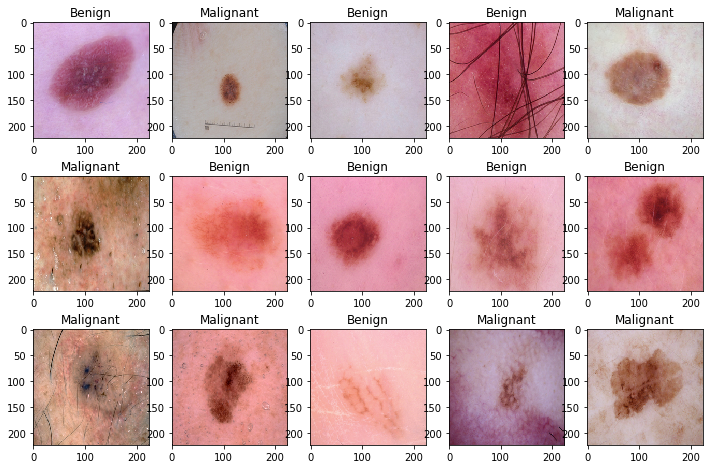

In [9]:
fig = plt.figure(figsize=(12,8))
columns = 5
rows = 3

for i in range(1, columns*rows+1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

## Encoding of Labels

In [10]:
import keras
from keras.utils.np_utils import to_categorical 

y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

type(y_train)

numpy.ndarray

In [11]:
y_train

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

## Normalization

In [12]:
## Normalize by dividing by RGB value
X_train = X_train/255
X_test = X_test/255

In [13]:
#X_train

## Building basic CNN model

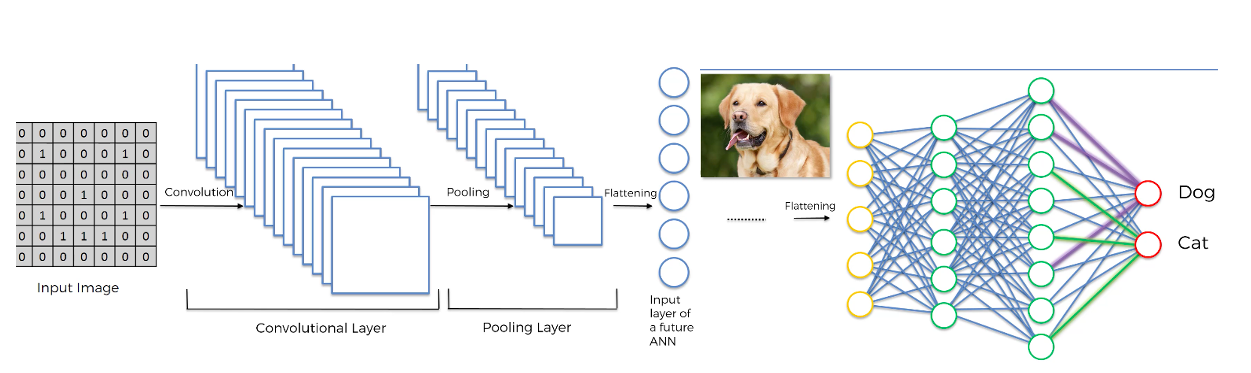

1. <b>Convolutional Layer</b>: Filters/Feature maps that are used to transform the images. This is called the Convolutional Layer.
2. <b>Pooling Layer</b>: Max Pooling is useful for downsampling. It reduces computational costs and also to some extent overfitting.
3. <b>Dropout</b>: Regularization method to randomly drop some nodes while training (i.e. setting their weights to 0). This forces the network to learn features in a distributed ways. Thus, prevents overfitting and improves generalization.
4. <b>Flatten</b>: Flatten layer is used to convert feature maps to 1D vector so that they can be used for prediction.
5. <b>Dense layer with Relu</b>: Dense Layer refers to simple ANN with non-linear Relu activation function.
6. <b>Dense layer with Softmax</b>: ANN layer with binary activation function Softmax for final classification.

In [14]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

def build_cnn_model(input_shape = (224, 224, 3), num_classes=2):
    
    model = Sequential()
    
    # adding 64 filters, each filter has a size of 3*3
    # padding is of 2 types: SAME and VALID (SAME means doing the padding around the image, VALID means no padding)
    # kernel initilizer is for intializing the weights of the network --> the default one is glorot_uniform so don't need to mention parameter
    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', input_shape = input_shape, activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size = (2,2)))
    # 25% of the nodes will be dropped out
    model.add(Dropout(0.25)) 
    
    
    model.add(Conv2D(64, kernel_size=(3,3), padding='Same', activation='relu', kernel_initializer = 'glorot_uniform'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Flatten())
    
    # normal initializer draws samples from a truncated normal distribution centered at 0 and SD = sqrt(2/number of input units)
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    model.add(Dense(128, activation='relu', kernel_initializer='normal'))
    
    model.add(Dense(num_classes, activation = 'softmax'))
    
    model.summary()
    
    
    ## OPTIMIZERS are the functions to adjust the weights and minimize the loss
    # Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems. 
    # Adam is relatively easy to configure where the default configuration parameters do well on most problems
    # lr is the alpha rate i.e. learning rate
    optimizer= Adam(lr=0.001) 
    
    model.compile(optimizer = optimizer, loss='binary_crossentropy', metrics=["accuracy"])
    
    return model   

In [15]:
## MODEL SUMMARY

model_cnn = build_cnn_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0

In [17]:
from keras.callbacks import ReduceLROnPlateau

# Learning rate annealer is used to reduce the learning rate by some percentage after certain number of training iterations/epochs
learning_rate_annealer = ReduceLROnPlateau(monitor='val_acc',
                                          patience=5,
                                          verbose=1,
                                          factor=0.5,
                                          min_lr = 1e-7)

# epochs is the number of iterations
# batch_size is the number of images in one epoch
# verbose = 1 shows us the animation of the epoch using progres_bar
history = model_cnn.fit(X_train, 
                    y_train, 
                    validation_split=0.2, 
                    epochs=50, 
                    batch_size = 64, 
                    verbose=1,
                    callbacks=[learning_rate_annealer])


# list all data in history
print(history.history.keys())

Epoch 1/50
33/33 [==============================] - 22s 493ms/step - loss: 1.6343 - accuracy: 0.5131 - val_loss: 0.6923 - val_accuracy: 0.5436
Epoch 2/50
33/33 [==============================] - 13s 400ms/step - loss: 0.6727 - accuracy: 0.5661 - val_loss: 0.6986 - val_accuracy: 0.5492
Epoch 3/50
33/33 [==============================] - 13s 402ms/step - loss: 0.5744 - accuracy: 0.6895 - val_loss: 0.4880 - val_accuracy: 0.7765
Epoch 4/50
33/33 [==============================] - 13s 404ms/step - loss: 0.4573 - accuracy: 0.7781 - val_loss: 0.4911 - val_accuracy: 0.7917
Epoch 5/50
33/33 [==============================] - 13s 400ms/step - loss: 0.4587 - accuracy: 0.7708 - val_loss: 0.4205 - val_accuracy: 0.7973
Epoch 6/50
33/33 [==============================] - 13s 404ms/step - loss: 0.4031 - accuracy: 0.7989 - val_loss: 0.4545 - val_accuracy: 0.7633
Epoch 7/50
33/33 [==============================] - 13s 404ms/step - loss: 0.3844 - accuracy: 0.7901 - val_loss: 0.4635 - val_accuracy: 0.7670

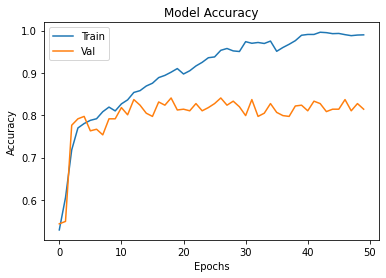

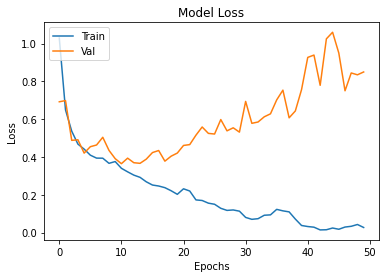

In [19]:
## Summarize model history for accuracy and loss for training and validation

# 1. Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# 2. Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')

plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

## Testing the model

In [24]:
from sklearn.metrics import accuracy_score

# Testing model on test data to evaluate
y_pred = np.argmax(model_cnn.predict(X_test), axis=-1)

print(accuracy_score(np.argmax(y_test, axis=1),y_pred))

0.8287878787878787


In [25]:
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

## Decent Accuracy of 82.9% with Basic CNN model

## References:

1. https://www.kaggle.com/fanconic/cnn-for-skin-cancer-detection
2. https://www.kaggle.com/rogeriovaz/skin-cancer-images-cnn-deep-learning/notebook
3. https://www.kaggle.com/sid321axn/step-wise-approach-cnn-model-77-0344-accuracy